<a href="https://colab.research.google.com/github/shensquared/optimization/blob/master/BisectionNewtonSecant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Roots finding methods
Note: a subroutine of minimizing $f(x)$ is to find the root of the $g(x)=f'(x)$, so we directly focus on root-finidng problems here. 

Code adapted from [Mathematical Python](https://www.math.ubc.ca/~pwalls/math-python/roots-optimization/bisection/)


In [ ]:
def bisection(f,a,b,N):
    '''Approximate solution of f(x)=0 on interval [a,b] by bisection method.

    Parameters
    ----------
    f : function
        The function for which we are trying to approximate a solution f(x)=0.
    a,b : numbers
        The interval in which to search for a solution. The function returns
        None if f(a)*f(b) >= 0 since a solution is not guaranteed.
    N : (positive) integer
        The number of iterations to implement.

    Returns
    -------
    x_N : number
        The midpoint of the Nth interval computed by the bisection method. The
        initial interval [a_0,b_0] is given by [a,b]. If f(m_n) == 0 for some
        midpoint m_n = (a_n + b_n)/2, then the function returns this solution.
        If all signs of values f(a_n), f(b_n) and f(m_n) are the same at any
        iteration, the bisection method fails and return None.

    Examples
    --------
    >>> f = lambda x: x**2 - x - 1
    >>> bisection(f,1,2,25)
    1.618033990263939
    >>> f = lambda x: (2*x - 1)*(x - 3)
    >>> bisection(f,0,1,10)
    0.5
    '''
    if f(a)*f(b) >= 0:
        print("Bisection method fails.")
        return None
    a_n = a
    b_n = b
    for n in range(1,N+1):
        m_n = (a_n + b_n)/2
        # c is only used for formatting the printing, not part of Bisection
        # algorithm
        c = '0'+str(n) if n<10 else str(n)
        print('iteration',c, m_n)
        f_m_n = f(m_n)
        if f(a_n)*f_m_n < 0:
          #meaning at a_n and m_n, function evaluations differ sign, so the true
          #root must be in the interval of [a_n, m_n], hence setting the next 
          # iteration's interval's right-end to be b=m_n
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            print("Found exact solution.")
            return m_n
        else:
            print("Bisection method fails.")
            return None
    return (a_n + b_n)/2

def newton(f,Df,x0,N,epsilon=1e-30):
    '''Approximate solution of f(x)=0 by Newton's method.

    Parameters
    ----------
    f : function
        Function for which we are searching for a solution f(x)=0.
    Df : function
        Derivative of f(x).
    x0 : number
        Initial guess for a solution f(x)=0.
    epsilon : number
        Stopping criteria is abs(f(x)) < epsilon.
    N : integer
        Maximum number of iterations of Newton's method.

    Returns
    -------
    xn : number
        Implement Newton's method: compute the linear approximation
        of f(x) at xn and find x intercept by the formula
            x = xn - f(xn)/Df(xn)
        Continue until reaches max iter N and return xn.
        If Df(xn) == 0, return None. If the number of iterations
        exceeds max_iter, then return None.

    Examples
    --------
    >>> f = lambda x: x**2 - x - 1
    >>> Df = lambda x: 2*x - 1
    >>> newton(f,Df,1,10, epsilon=1e-8)
    Found solution after 5 iterations.
    1.618033988749989
    '''
    xn = x0
    for n in range(1,N+1):
        fxn = f(xn)
        c = '0'+str(n) if n<10 else str(n)
        print('iteration',c, xn)
        Dfxn = Df(xn)
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return None
        xn = xn - fxn/Dfxn
    # print('Exceeded maximum iterations. No solution found.')
    return None

def secant(f,a,b,N):
    '''Approximate solution of f(x)=0 on interval [a,b] by the secant method.

    Parameters
    ----------
    f : function
        The function for which we are trying to approximate a solution f(x)=0.
    a,b : numbers
        The interval in which to search for a solution. The function returns
        None if f(a)*f(b) >= 0 since a solution is not guaranteed.
    N : (positive) integer
        The number of iterations to implement.

    Returns
    -------
    m_N : number
        The x intercept of the secant line on the the Nth interval
            m_n = a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))
        The initial interval [a_0,b_0] is given by [a,b]. If f(m_n) == 0
        for some intercept m_n then the function returns this solution.
        If all signs of values f(a_n), f(b_n) and f(m_n) are the same at any
        iterations, the secant method fails and return None.

    Examples
    --------
    >>> f = lambda x: x**2 - x - 1
    >>> secant(f,1,2,5)
    1.6180257510729614
    '''
    if f(a)*f(b) >= 0:
        print("Secant method fails.")
        return None
    a_n = a
    b_n = b
    for n in range(1,N+1):
        m_n = a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))
        f_m_n = f(m_n)
        c = '0'+str(n) if n<10 else str(n)
        print('iteration',c, m_n)
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            print("Found exact solution.")
            return m_n
        else:
            print("Secant method fails.")
            return None
    return a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))


# The following are purely for plotting
import matplotlib.pyplot as plt
import numpy as np
def plot_g(g,a,b,dg=None, p1=None,p2=None):
  x = np.linspace(a,b,100)
  y = g(x)
  plt.plot(x, y, label="g(x)")
  plt.plot(x,np.zeros((100,),),label='zero line')
  plt.plot()
  if dg is not None:
    b1 = g(p1)-dg(p1)*p1
    b2 = g(p2)-dg(p2)*p2
    plt.plot(x, dg(p1)*x + b1)
    plt.plot(x, dg(p2)*x + b2)

  plt.xlabel("x axis")
  plt.ylabel("y axis")
  plt.title("Function g(x) to find root of")
  plt.legend()
  plt.show()

def plot_f():
  a =-.5
  b=6
  x = np.linspace(a,b,100)
  f=lambda x: -411.6 *x + 259.7 *x**2 - 57.4 *x**3 + 5.55* x**4 - 0.2*x**5
  y = f(x)
  plt.plot(x, y, label="f(x)")
  plt.plot()
  plt.xlabel("x axis")
  plt.ylabel("y axis")
  plt.title("f=-411.6 x + 259.7 x² - 57.4 x³ + 5.55 x⁴ - 0.2 x⁵", fontsize=12)
  plt.legend()
  plt.show()

# Let's see how they work for our motivating example

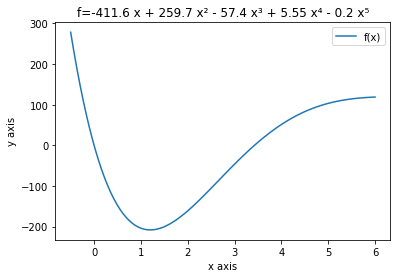

In [ ]:
plot_f()

To find the candidate local min for $f(x)$, we look for root of $g(x):=f'(x)$

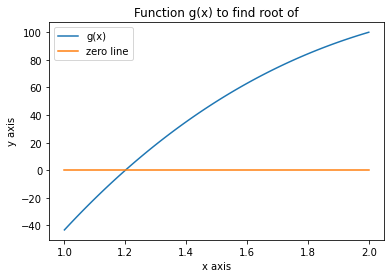

In [ ]:
g = lambda x:-(x-7)**3*(x-1.2) #expands to 411.6 - 519.4 x + 172.2 x² - 22.2 x³ + x⁴, g=f'
dg = lambda x: -(-519.4 + 344.4*x - 66.6*x**2 + 4*x**3)
plot_g(g,1,2)

In [ ]:
b = bisection(g,1,3,10)

iteration 01 2.0
iteration 02 1.5
iteration 03 1.25
iteration 04 1.125
iteration 05 1.1875
iteration 06 1.21875
iteration 07 1.203125
iteration 08 1.1953125
iteration 09 1.19921875
iteration 10 1.201171875


In [ ]:
n = newton(g,dg,1,10)

iteration 01 1
iteration 02 1.1818181818181817
iteration 03 1.1998311286236982
iteration 04 1.199999985251265
iteration 05 1.1999999999999997
iteration 06 1.2
iteration 07 1.2
iteration 08 1.2
iteration 09 1.2
iteration 10 1.2


In [ ]:
s = secant(g,1,3,10)

iteration 01 1.5454545454545454
iteration 02 1.237388900448857
iteration 03 1.203658638302611
iteration 04 1.2003542120051054
iteration 05 1.200034257435052
iteration 06 1.2000033128565981
iteration 07 1.2000003203658371
iteration 08 1.200000030980566
iteration 09 1.2000000029959355
iteration 10 1.200000000289718


# Differnt ways Newton's method can 'go wrong'

### Bad example 1 (oscillates)

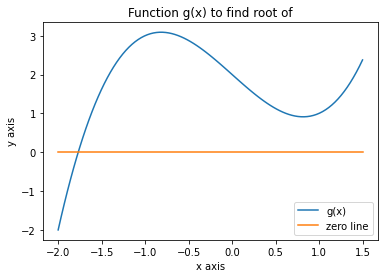

In [ ]:
g_bad1 = lambda x: x**3 - 2*x +2
dg_bad1=lambda x: 3*x**2 - 2
plot_g(g_bad1,-2,1.5)

In [ ]:
n_bad1 = newton(g_bad1,dg_bad1,0,10)

iteration 01 0
iteration 02 1.0
iteration 03 0.0
iteration 04 1.0
iteration 05 0.0
iteration 06 1.0
iteration 07 0.0
iteration 08 1.0
iteration 09 0.0
iteration 10 1.0


Why so? Let's plot out the tangent lines... 

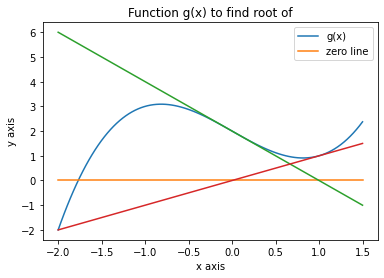

In [ ]:
plot_g(g_bad1,-2,1.5, dg_bad1,0,1)

### Bad example 2 (diverges)

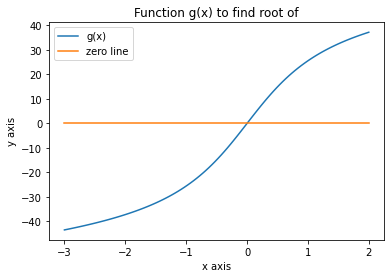

In [ ]:
g_bad2 = lambda x: 30* np.arctan(x) + 2*x
dg_bad2=lambda x: 30/(1+(x)**2) + 2
plot_g(g_bad2,-3,2)

In [ ]:
n_bad2 = newton(g_bad2,dg_bad2,2,10)

iteration 01 2
iteration 02 -2.6518076917278393
iteration 03 4.60346823295529
iteration 04 -10.287948780125504
iteration 05 18.120156218978632
iteration 06 -20.955261867862188
iteration 07 21.4030471541725
iteration 08 -21.461106011682343
iteration 09 21.46842428563779
iteration 10 -21.46934342619276


In [ ]:
 #even though trying a different starting point 1 actually converges
newton(g_bad2,dg_bad2,1,10)

iteration 01 1
iteration 02 -0.5036438177602027
iteration 03 0.07499276542612121
iteration 04 -0.000263207288816375
iteration 05 1.1396559043697074e-11
iteration 06 0.0
iteration 07 0.0
iteration 08 0.0
iteration 09 0.0
iteration 10 0.0


### Bad example 3: (Newton's Fractal)
Finding roots to $g(z)=z^5-1$.

[Animation](https://chrizbee.github.io/NewtonFractal/)